In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
data = pd.read_csv('wrangled_data.csv', header=0)

In [3]:
data.head()

,EFFECTIVE DATE,COMPANY,CUSIP,SALES-PRICE,BV-PRICE,ROA,EPS-PRICE,PRICE MOM,EPS-MOMENTUM,NEXT MONTH TR,SALES-PRICE DISCRETE,BV-PRICE DISCRETE,ROA DISCRETE,EPS-PRICE DISCRETE,PRICE MOM DISCRETE,EPS-MOMENTUM DISCRETE,NEXT MONTH TR DISCRETE
0,19941230,A.G. Edwards,281760108,71.035611,0.484281,7.124138,0.081667,-0.060000,0.050000,0.020833,4,3,5,4,3,5,0
1,19941230,AFLAC Inc.,001055102,191.641594,0.045786,1.819224,0.007188,-0.003956,0.000000,0.082031,5,1,4,1,5,3,1
2,19941230,AMRESCO Inc.,031909104,23.286519,3.566218,19.328806,0.666667,-0.188811,0.041667,-0.074074,2,5,5,5,1,5,0
3,19941230,Aetna Inc. (Old),008140105,380.604775,0.259135,0.507874,0.023979,-0.029810,-0.073770,0.065040,5,2,1,1,4,1,1
4,19941230,Alex Brown Inc,013902101,19.933761,0.573544,5.829485,0.093498,0.027149,-0.053333,0.149794,2,3,5,4,5,1,1


###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################

Create dataframe that groups each of the continuous features by date and then computes the mean

In [4]:
group_mean = pd.DataFrame(data.groupby(['EFFECTIVE DATE'])[['SALES-PRICE', 'BV-PRICE', 'ROA', 'EPS-PRICE', 'PRICE MOM', \
                                                  'EPS-MOMENTUM']].mean())

group_mean.reset_index(inplace=True)

group_mean['YEAR'] = pd.to_numeric(group_mean['EFFECTIVE DATE'].astype(str).str[:4])

group_mean.head()

,EFFECTIVE DATE,SALES-PRICE,BV-PRICE,ROA,EPS-PRICE,PRICE MOM,EPS-MOMENTUM,YEAR
0,19941230,93.013795,0.583163,1.688358,0.069215,-0.055274,-0.023681,1994
1,19950131,85.963799,0.551001,1.598740,0.068408,0.015117,0.047893,1995
2,19950228,80.820666,0.526667,1.584282,0.074553,0.048544,0.108013,1995
3,19950331,83.207543,0.528183,1.579052,0.075134,0.055689,0.166689,1995
4,19950428,79.848192,0.505853,1.579052,0.072148,0.007267,0.111731,1995


Plot each of the features by year

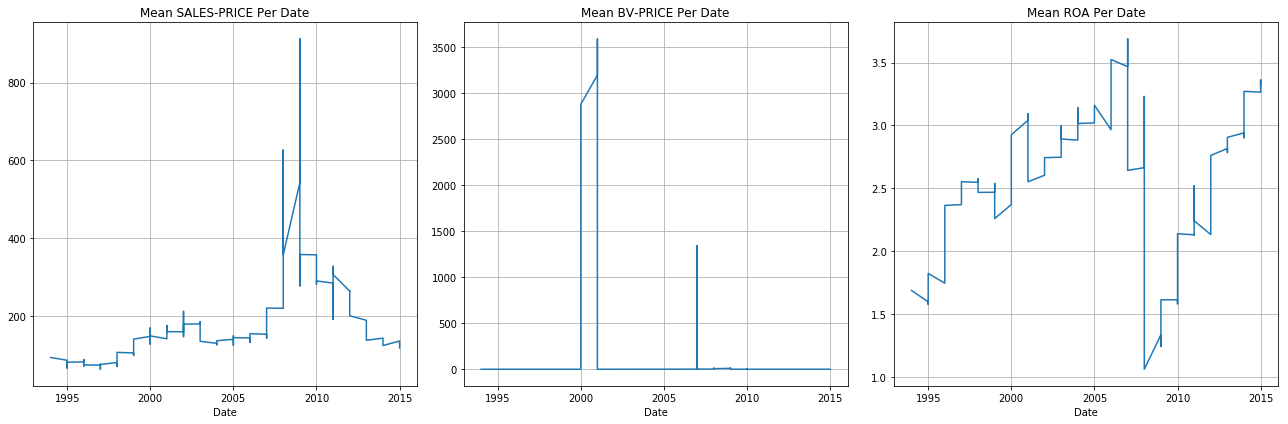

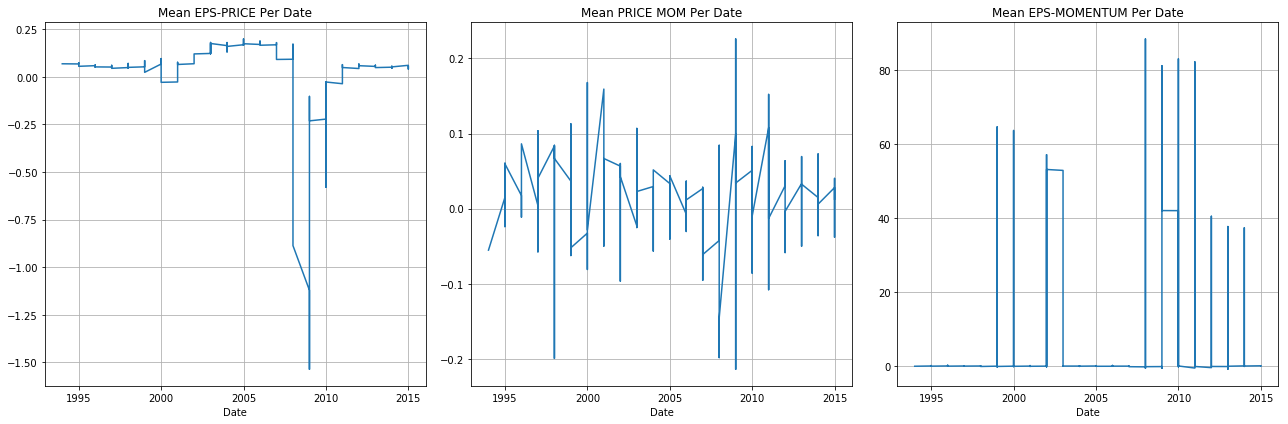

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

ax = group_mean.reset_index().plot(x='YEAR', y='SALES-PRICE', legend=False, ax=axs[0])
ax.set(title='Mean SALES-PRICE Per Date', xlabel='Date')
ax.grid(which='both')

ax = group_mean.reset_index().plot(x='YEAR', y='BV-PRICE', legend=False, ax=axs[1])
ax.set(title='Mean BV-PRICE Per Date', xlabel='Date')
ax.grid(which='both')

ax = group_mean.reset_index().plot(x='YEAR', y='ROA', legend=False, ax=axs[2])
ax.set(title='Mean ROA Per Date', xlabel='Date')
ax.grid(which='both')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

ax = group_mean.reset_index().plot(x='YEAR', y='EPS-PRICE', legend=False, ax=axs[0])
ax.set(title='Mean EPS-PRICE Per Date', xlabel='Date')
ax.grid(which='both')

ax = group_mean.reset_index().plot(x='YEAR', y='PRICE MOM', legend=False, ax=axs[1])
ax.set(title='Mean PRICE MOM Per Date', xlabel='Date')
ax.grid(which='both')

ax = group_mean.reset_index().plot(x='YEAR', y='EPS-MOMENTUM', legend=False, ax=axs[2])
ax.set(title='Mean EPS-MOMENTUM Per Date', xlabel='Date')
ax.grid(which='both')

plt.tight_layout()
plt.show()

###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################

Correlation matrix and heatmap for the entire (i.e., ungrouped) dataframe

In [6]:
data.iloc[:, 3:9].corr()

,SALES-PRICE,BV-PRICE,ROA,EPS-PRICE,PRICE MOM,EPS-MOMENTUM
SALES-PRICE,1.000000,0.001284,-0.064477,-0.136008,-0.050860,0.011113
BV-PRICE,0.001284,1.000000,0.001107,-0.000989,-0.003642,-0.000475
ROA,-0.064477,0.001107,1.000000,0.029105,0.004300,-0.016125
EPS-PRICE,-0.136008,-0.000989,0.029105,1.000000,0.039824,0.000566
PRICE MOM,-0.050860,-0.003642,0.004300,0.039824,1.000000,0.003279
EPS-MOMENTUM,0.011113,-0.000475,-0.016125,0.000566,0.003279,1.000000


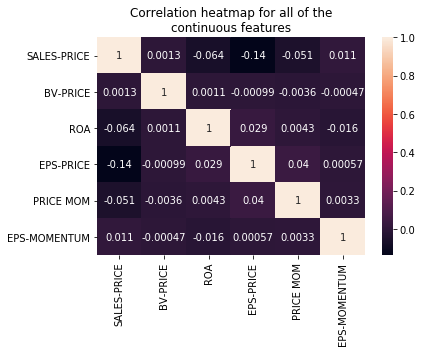

In [7]:
sns.heatmap(data.iloc[:, 3:9].corr(), annot=True)
plt.title('Correlation heatmap for all of the\ncontinuous features')
plt.show()

Correlation matrix for the grouped (by date) dataframe

In [31]:
group_mean.iloc[:, 1:7].corr()

,SALES-PRICE,BV-PRICE,ROA,EPS-PRICE,PRICE MOM,EPS-MOMENTUM
SALES-PRICE,1.000000,-0.040457,-0.293599,-0.700643,-0.242148,0.198320
BV-PRICE,-0.040457,1.000000,0.208995,0.004616,-0.025861,-0.090913
ROA,-0.293599,0.208995,1.000000,0.538139,-0.071371,-0.158263
EPS-PRICE,-0.700643,0.004616,0.538139,1.000000,0.160489,-0.112168
PRICE MOM,-0.242148,-0.025861,-0.071371,0.160489,1.000000,-0.027996
EPS-MOMENTUM,0.198320,-0.090913,-0.158263,-0.112168,-0.027996,1.000000


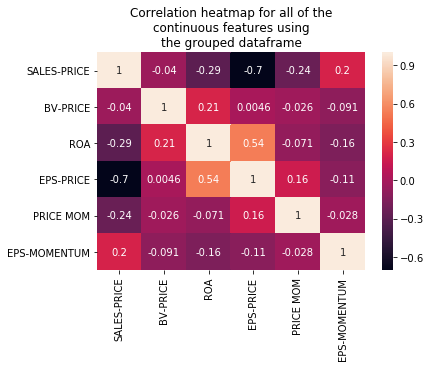

In [32]:
sns.heatmap(group_mean.iloc[:, 1:7].corr(), annot=True)
plt.title('Correlation heatmap for all of the\ncontinuous features using\nthe grouped dataframe')
plt.show()

###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################

Single linear regression using each continuous feature

First, adjust names with underscores so that they can interact with statsmodels

In [8]:
colnames = list(data.columns)

colnames[3] = 'SALES_PRICE'
colnames[4] = 'BV_PRICE'
colnames[6] = 'EPS_PRICE'
colnames[7] = 'PRICE_MOMENTUM'
colnames[8] = 'EPS_MOMENTUM'
colnames[9] = 'NEXT_MONTH_TR'

data.columns = colnames

In [9]:
OLS_results = []

regressors = list(data.columns)[3:9]
regressors2 = [i + ' only' for i in regressors]

for i in regressors:
    regmodel = ols('NEXT_MONTH_TR ~ ' + i, data=data).fit()
    OLS_results.append([regmodel.tvalues[1], regmodel.pvalues[1], regmodel.rsquared])
OLS_results

print('Single Linear Regression Using Each Feature:')

pd.DataFrame(dict(zip(regressors2, OLS_results)), index=['t-stat', 'p-value', 'R-squared'])

Single Linear Regression Using Each Feature:


,SALES_PRICE only,BV_PRICE only,ROA only,EPS_PRICE only,PRICE_MOMENTUM only,EPS_MOMENTUM only
t-stat,4.620619,-0.922830,-0.390026,-5.507858e+00,-1.506150e+01,-0.707716
p-value,0.000004,0.356100,0.696519,3.650024e-08,3.753553e-51,0.479125
R-squared,0.000425,0.000017,0.000003,6.035752e-04,4.495810e-03,0.000010


###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################

In [10]:
data.head()

,EFFECTIVE DATE,COMPANY,CUSIP,SALES_PRICE,BV_PRICE,ROA,EPS_PRICE,PRICE_MOMENTUM,EPS_MOMENTUM,NEXT_MONTH_TR,SALES-PRICE DISCRETE,BV-PRICE DISCRETE,ROA DISCRETE,EPS-PRICE DISCRETE,PRICE MOM DISCRETE,EPS-MOMENTUM DISCRETE,NEXT MONTH TR DISCRETE
0,19941230,A.G. Edwards,281760108,71.035611,0.484281,7.124138,0.081667,-0.060000,0.050000,0.020833,4,3,5,4,3,5,0
1,19941230,AFLAC Inc.,001055102,191.641594,0.045786,1.819224,0.007188,-0.003956,0.000000,0.082031,5,1,4,1,5,3,1
2,19941230,AMRESCO Inc.,031909104,23.286519,3.566218,19.328806,0.666667,-0.188811,0.041667,-0.074074,2,5,5,5,1,5,0
3,19941230,Aetna Inc. (Old),008140105,380.604775,0.259135,0.507874,0.023979,-0.029810,-0.073770,0.065040,5,2,1,1,4,1,1
4,19941230,Alex Brown Inc,013902101,19.933761,0.573544,5.829485,0.093498,0.027149,-0.053333,0.149794,2,3,5,4,5,1,1


Histograms for features and the target

First, filter the dataframes for select columns in order to remove outliers

In [23]:
short_BV = data[(data['BV_PRICE'] < 5) & (data['BV_PRICE'] > -1)]

short_EPSMOM = data[(data['EPS_MOMENTUM'] < 5) & (data['EPS_MOMENTUM'] > -5)]

Now plot

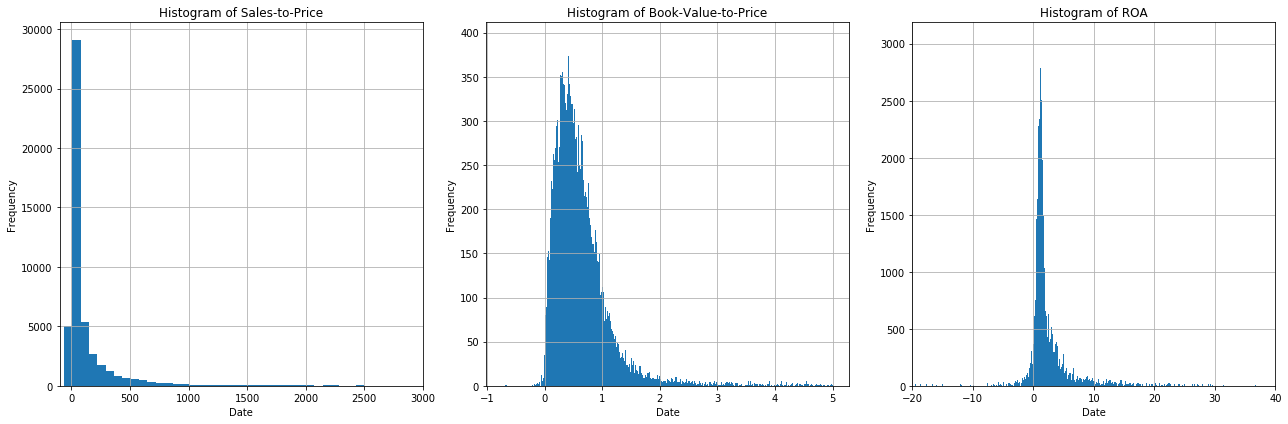

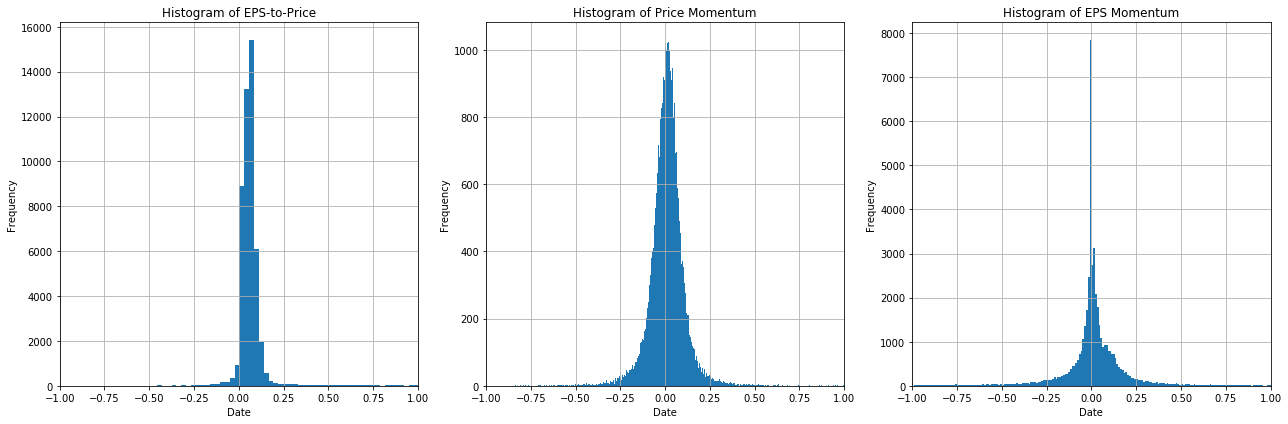

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

ax = data['SALES_PRICE'].plot(kind='hist', bins=1000, ax=axs[0])
ax.set(title='Histogram of Sales-to-Price', xlabel='Date')
ax.set_xlim([-100,3000])
ax.grid(which='both')

ax = short_BV['BV_PRICE'].plot(kind='hist', bins=1000, ax=axs[1])
ax.set(title='Histogram of Book-Value-to-Price', xlabel='Date')
ax.grid(which='both')

ax = data['ROA'].plot(kind='hist', bins=1000, ax=axs[2])
ax.set(title='Histogram of ROA', xlabel='Date')
ax.set_xlim([-20,40])
ax.grid(which='both')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

ax = data['EPS_PRICE'].plot(kind='hist', bins=10000, ax=axs[0])
ax.set(title='Histogram of EPS-to-Price', xlabel='Date')
ax.set_xlim([-1,1])
ax.grid(which='both')

ax = data['PRICE_MOMENTUM'].plot(kind='hist', bins=1000, ax=axs[1])
ax.set(title='Histogram of Price Momentum', xlabel='Date')
ax.set_xlim([-1,1])
ax.grid(which='both')

ax = short_EPSMOM['EPS_MOMENTUM'].plot(kind='hist', bins=1000, ax=axs[2])
ax.set(title='Histogram of EPS Momentum', xlabel='Date')
ax.set_xlim([-1,1])
ax.grid(which='both')

plt.tight_layout()
plt.show()

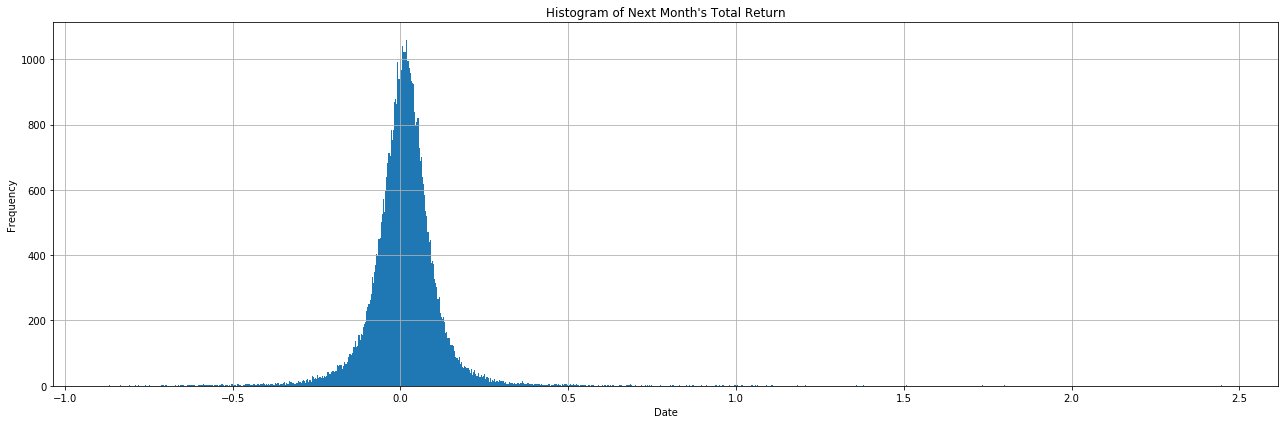

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

ax = data['NEXT_MONTH_TR'].plot(kind='hist', bins=1000)
ax.set(title='Histogram of Next Month\'s Total Return', xlabel='Date')
ax.grid(which='both')

plt.tight_layout()
plt.show()

In [30]:
data.to_csv('post_EDA.csv')